In [2]:
# ngoài lề: in ma trận 
import numpy as np

def print_matrix(matrix, precision=4):
    """
    In ma trận với định dạng đẹp và tùy chọn số chữ số sau dấu phẩy.
    
    Tham số:
    matrix (numpy.ndarray): Ma trận cần in.
    precision (int): Số chữ số sau dấu phẩy.
    """
    format_string = "{:." + str(precision) + "f}"
    rows, cols = matrix.shape
    
    for i in range(rows):
        row_str = "    ".join([format_string.format(matrix[i, j]) for j in range(cols)])
        print(row_str)





In [5]:
### mỗi thuật toán thường có tiên nghiệm và hậu nghiệm, đó là cách dùng sai số thôi

# 1 Thuật toán lặp đơn X = BX + d

## 1.1 Tiên Nghiệm

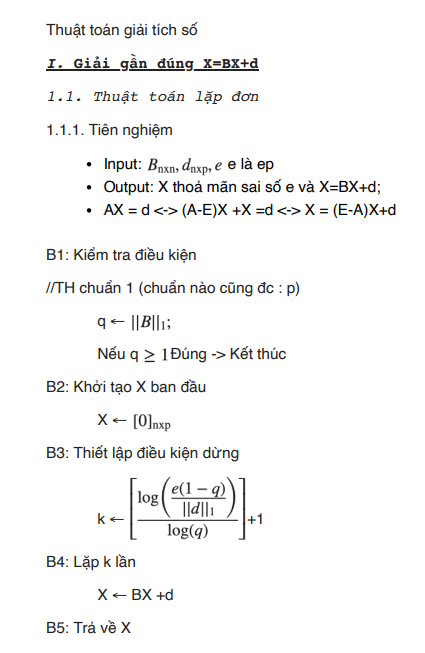

In [25]:
import numpy as np
# ta đặt B = A-E
def simple_iteration_method_1(B, d, e=0.001):

    # Check the condition
    q = np.linalg.norm(B, 1)
    print(f'q = {q}')
    if q >= 1:
        print("không hội tụ")
        return None
    else:
        X = np.zeros(d.shape)
        print('khởi tạo X:')
        print_matrix(X)
        print('--------------------------------------------------')
        # Setup stopping condition
        k = int(np.floor(np.log(e * (1 - q) / np.linalg.norm(d, 1)) / np.log(q))) + 1
        print(f'k = {k}')
        # Iterate
        for i in range(k):
            print(f'lần lặp {i+1}')
            X = np.dot(B, X) + d
            print_matrix(X)
            print("-----------------------------")
        return X

# Example usage
B = np.array([[0.8990, -0.0030, -0.0010, -0.0030, -0.0050, -0.0030, -0.0040, -0.0020, -0.0030, -0.0050],
 [-0.0040, 0.7990, -0.0050, -0.0050, -0.0040, -0.0010, -0.0020, -0.0020, -0.0020, -0.0040],
[ -0.0020, -0.0020, 0.6990, -0.0010, -0.0020, -0.0050 ,-0.0020 ,-0.0050, -0.0040 ,-0.0030],
[ -0.0030, -0.0050, -0.0040, 0.5980 ,-0.0030, -0.0050, -0.0030 ,-0.0010, -0.0010 ,-0.0030],
[ -0.0010, -0.0010, -0.0050, -0.0010, 0.4970, -0.0030, -0.0010 ,-0.0010, -0.0040 ,-0.0030],
[ -0.0040, -0.0050, -0.0050, -0.0010, -0.0010, 0.3970 ,-0.0010 ,-0.0010, -0.0010 ,-0.0020],
[ -0.0020, -0.0030, -0.0010, -0.0050, -0.0020, -0.0020, 0.2950 ,-0.0040, -0.0020 ,-0.0030],
[ -0.0040 ,-0.0050, -0.0020, -0.0030, -0.0010, -0.0050, -0.0050, 0.1960, -0.0040 ,-0.0030],
[ -0.0040, -0.0010, -0.0020, -0.0030, -0.0010, -0.0020, -0.0030, -0.0040, 0.0960 ,-0.0050],
[ -0.0040, -0.0030, -0.0050 ,-0.0010 ,-0.0020 ,-0.0010 ,-0.0010, -0.0030, -0.0010 ,-0.0040]])  # Replace with actual matrix B
d = np.eye(B.shape[0])
result = simple_iteration_method_1(B, d)
print("Final result:", result)


q = 0.927
khởi tạo X:
0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
--------

## 1.2 Hậu Nghiệm 

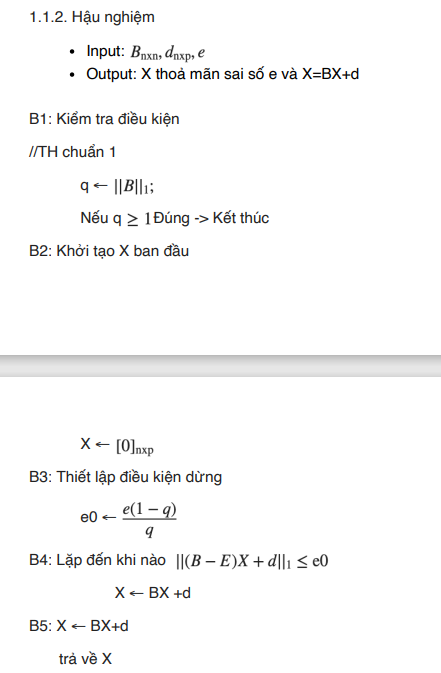

In [10]:
import numpy as np

def simple_iteration_method_2(B,d, e=0.001):
    
    q = np.linalg.norm(B, 1)
    print(f'q = {q}')
    
    
    if q >= 1:
        print("không hội tụ")
        return None
    else:
        X = np.zeros(d.shape)
        e0 = e * (1 - q) / q
        print('khởi tạo X: ')
        print(X)
        print('----------------------------------------')
        print(f'e0 = {e0}')
        while np.linalg.norm(np.dot(B - np.eye(B.shape[0]), X) + d, 1) > e0:
            X = np.dot(B, X) + d
            print("----------------")
            print_matrix(X)
        X = np.dot(B, X) + d
       
        return X

# Example usage
B = np.array([[0.8990, -0.0030, -0.0010, -0.0030, -0.0050, -0.0030, -0.0040, -0.0020, -0.0030, -0.0050],
 [-0.0040, 0.7990, -0.0050, -0.0050, -0.0040, -0.0010, -0.0020, -0.0020, -0.0020, -0.0040],
[ -0.0020, -0.0020, 0.6990, -0.0010, -0.0020, -0.0050 ,-0.0020 ,-0.0050, -0.0040 ,-0.0030],
[ -0.0030, -0.0050, -0.0040, 0.5980 ,-0.0030, -0.0050, -0.0030 ,-0.0010, -0.0010 ,-0.0030],
[ -0.0010, -0.0010, -0.0050, -0.0010, 0.4970, -0.0030, -0.0010 ,-0.0010, -0.0040 ,-0.0030],
[ -0.0040, -0.0050, -0.0050, -0.0010, -0.0010, 0.3970 ,-0.0010 ,-0.0010, -0.0010 ,-0.0020],
[ -0.0020, -0.0030, -0.0010, -0.0050, -0.0020, -0.0020, 0.2950 ,-0.0040, -0.0020 ,-0.0030],
[ -0.0040 ,-0.0050, -0.0020, -0.0030, -0.0010, -0.0050, -0.0050, 0.1960, -0.0040 ,-0.0030],
[ -0.0040, -0.0010, -0.0020, -0.0030, -0.0010, -0.0020, -0.0030, -0.0040, 0.0960 ,-0.0050],
[ -0.0040, -0.0030, -0.0050 ,-0.0010 ,-0.0020 ,-0.0010 ,-0.0010, -0.0030, -0.0010 ,-0.0040]])  # Replace with actual matrix B
d = np.eye(B.shape[0])
d = np.eye(B.shape[0])
result = simple_iteration_method_2(B,d)
print("Final result:")
print_matrix(result)


q = 0.927
khởi tạo X: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
----------------------------------------
e0 = 7.87486515641855e-05
----------------
1.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
0.0000    1.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
0.0000    0.0000    1.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
0.0000    0.0000    0.0000    1.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
0.0000    0.0000    0.0000    0.0000    1.0000    0.0000    0.0000    0.0000    0.0000    0.0000
0.0000    0.0000    0.0000    0.0000    0.0000    1.0000    0.0000    0.0000 

# 2 Thuật toán jacobi X = BX+d (X = BX + b ) biến đổi từ AX=b

## 2.1 tiên nghiệm

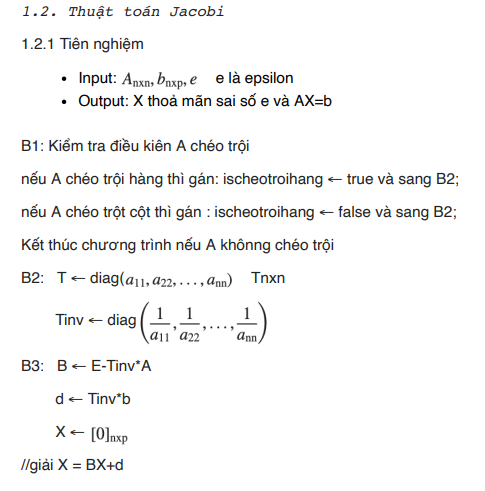  
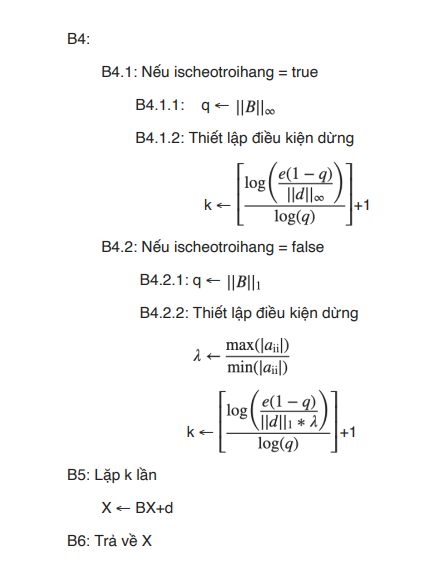

In [3]:
import numpy as np

def ischeotroihang(A):
    """
    Kiểm tra xem ma trận A có chéo trội theo hàng không.
    
    Tham số:
    A (numpy.ndarray): Ma trận A.
    
    Trả về:
    bool: True nếu A chéo trội theo hàng, ngược lại là False.
    """
    n = A.shape[0]
    for i in range(n):
        tmp = np.sum(np.abs(A[i, :]))
        if 2 * np.abs(A[i, i]) - tmp <= 0:
            return False
    return True

def ischeotroicot(A):
    """
    Kiểm tra xem ma trận A có chéo trội theo cột không.
    
    Tham số:
    A (numpy.ndarray): Ma trận A.
    
    Trả về:
    bool: True nếu A chéo trội theo cột, ngược lại là False.
    """
    n = A.shape[0]
    for j in range(n):
        tmp = np.sum(np.abs(A[:, j]))
        if 2 * np.abs(A[j, j]) - tmp <= 0:
            return False
    return True

def jacobi_method_1(A, b=None, e=0.001):
    """
    Giải hệ phương trình AX = b bằng phương pháp Jacobi.
    
    Tham số:
    A (numpy.ndarray): Ma trận A.
    b (numpy.ndarray): Ma trận/vector b ở vế phải. Nếu không cung cấp, mặc định là ma trận đơn vị.
    e (float): Sai số để điều kiện dừng.
    
    Trả về:
    numpy.ndarray: Xấp xỉ nghiệm X của hệ phương trình.
    """
    if b is None:
        b = np.eye(A.shape[0])
        
    print("Phương pháp Jacobi giải gần đúng AX=d")
    
    # Kiểm tra điều kiện chéo trội
    if not (ischeotroihang(A) or ischeotroicot(A)):
        print('không chéo trội')
        return None
    else:
        T = np.diag(np.diag(A))
        print(f'T = \n{T}')
        Tinv = np.diag(1 / np.diag(A))
        print(f'Tinv = \n{Tinv}')
        E = np.eye(A.shape[0])
        B = E - np.dot(Tinv, A)
        print(f'B = \n{B}')
        d = np.dot(Tinv, b)
        print(f'd = {b}')
        X = np.zeros(b.shape)

        if ischeotroihang(A):
            print('chéo trội hàng')
            q = np.linalg.norm(B, np.inf)
            print(f'q = {q}')

            # Điều kiện dừng
            k = int(np.floor(np.log(e * (1 - q) / np.linalg.norm(d, np.inf)) / np.log(q)) + 1)
        else:
            print('chéo trội cột')
            q = np.linalg.norm(B, 1)
            print(f'q = {q}')
           
            landa = np.max(np.abs(np.diag(T))) / np.min(np.abs(np.diag(T)))
            print(f'lamda = {landa}')
            # Điều kiện dừng
            k = int(np.floor(np.log(e * (1 - q) / (np.linalg.norm(d, 1) * landa)) / np.log(q)) + 1)
            print(f'k:{k}')
        for i in range(k):
            X = np.dot(B, X) + d
            print("----------------------------")
            print_matrix(X)
        return X

# Ví dụ sử dụng
A = np.array([[20,	1,	2,	-3,	2],
                [-5,	50,	-12,	6,	3],
                [4,	3,	50,	2,	11],
                [-5,	-3,	2,	30,	-7],
                [3,	1,	-4,	9,	40]])
 # Thay thế bằng ma trận A thực tế
b = np.eye(A.shape[0])
result = jacobi_method_1(A, b)
if result is not None:
    print("----------------------------")
    print("Kết quả cuối cùng:")
    print_matrix(result)  # Số chữ số thập phân mong muốn


Phương pháp Jacobi giải gần đúng AX=d
T = 
[[20  0  0  0  0]
 [ 0 50  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 30  0]
 [ 0  0  0  0 40]]
Tinv = 
[[0.05       0.         0.         0.         0.        ]
 [0.         0.02       0.         0.         0.        ]
 [0.         0.         0.02       0.         0.        ]
 [0.         0.         0.         0.03333333 0.        ]
 [0.         0.         0.         0.         0.025     ]]
B = 
[[ 0.         -0.05       -0.1         0.15       -0.1       ]
 [ 0.1         0.          0.24       -0.12       -0.06      ]
 [-0.08       -0.06        0.         -0.04       -0.22      ]
 [ 0.16666667  0.1        -0.06666667  0.          0.23333333]
 [-0.075      -0.025       0.1        -0.225       0.        ]]
d = [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
chéo trội hàng
q = 0.5666666666666667
----------------------------
0.0500    0.0000    0.0000    0.0000    0.0000
0.0000    0.0200    0.0000    0.0000 

## 2.2 hậu nghiệm

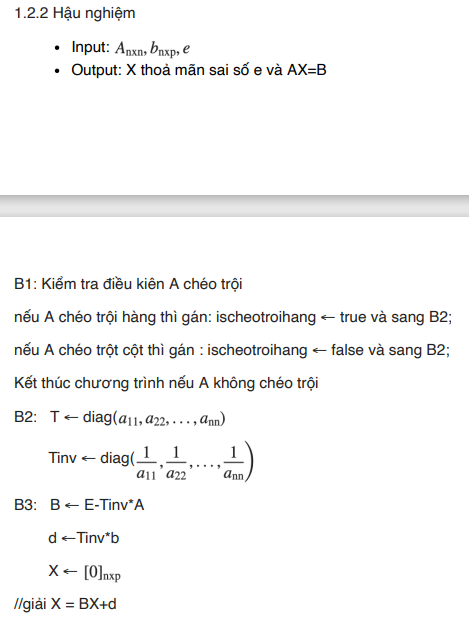  
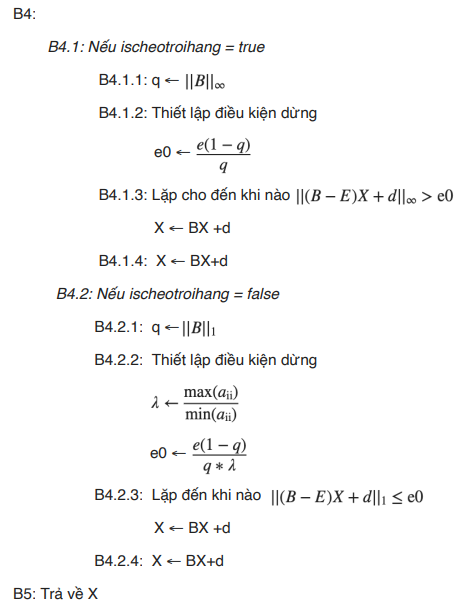

In [20]:
import numpy as np

def ischeotroihang(A):
    """
    Kiểm tra xem ma trận A có chéo trội theo hàng không.
    
    Tham số:
    A (numpy.ndarray): Ma trận A.
    
    Trả về:
    bool: True nếu A chéo trội theo hàng, ngược lại là False.
    """
    n = A.shape[0]
    for i in range(n):
        tmp = np.sum(np.abs(A[i, :]))
        if 2 * np.abs(A[i, i]) - tmp <= 0:
            return False
    return True

def ischeotroicot(A):
    """
    Kiểm tra xem ma trận A có chéo trội theo cột không.
    
    Tham số:
    A (numpy.ndarray): Ma trận A.
    
    Trả về:
    bool: True nếu A chéo trội theo cột, ngược lại là False.
    """
    n = A.shape[0]
    for j in range(n):
        tmp = np.sum(np.abs(A[:, j]))
        if 2 * np.abs(A[j, j]) - tmp <= 0:
            return False
    return True

def jacobi_method_2(A, b=None, e=0.001, precision=4):
    """
    Giải hệ phương trình AX = b bằng phương pháp Jacobi.
    
    Tham số:
    A (numpy.ndarray): Ma trận A.
    b (numpy.ndarray): Ma trận/vector b ở vế phải. Nếu không cung cấp, mặc định là ma trận đơn vị.
    e (float): Sai số để điều kiện dừng.
    precision (int): Số chữ số sau dấu phẩy để in ra.
    
    Trả về:
    numpy.ndarray: Xấp xỉ nghiệm X của hệ phương trình.
    """
    if b is None:
        b = np.eye(A.shape[0])
        
    print("Phương pháp Jacobi giải gần đúng AX=d")
    
    # Kiểm tra điều kiện chéo trội
    if not (ischeotroihang(A) or ischeotroicot(A)):
        print('không chéo trội')
        return None
    else:
        T = np.diag(np.diag(A))
        Tinv = np.diag(1 / np.diag(A))
        E = np.eye(A.shape[0])
        B = E - np.dot(Tinv, A)
        d = np.dot(Tinv, b)
        X = np.zeros(b.shape)

        if ischeotroihang(A):
            print('chéo trội hàng')
            q = np.linalg.norm(B, np.inf)
            print(f'q = {q}')
            
            # Thiết lập điều kiện dừng
            e0 = e * (1 - q) / q
            print(f'e0 = {e0}')
           
            # Lặp
            while np.linalg.norm((B - E).dot(X) + d, np.inf) > e0:
                print("----------------------------")
                print(f'điều kiện dừng   = {np.linalg.norm((B - E).dot(X) + d, np.inf)}')
                X = B.dot(X) + d
                print("----------------------------")
                print_matrix(X)
            print("----------------------------")
            print(f'điều kiện dừng   = {np.linalg.norm((B - E).dot(X) + d, np.inf)} <{e0}' )
            X = B.dot(X) +d
    return X

# Ví dụ sử dụng
A = np.array([[20,	1,	2,	-3,	2],
                [-5,	50,	-12,	6,	3],
                [4,	3,	50,	2,	11],
                [-5,	-3,	2,	30,	-7],
                [3,	1,	-4,	9,	40]])
 # Thay thế bằng ma trận A thực tế
b = np.eye(A.shape[0])
result = jacobi_method_2(A, b)
if result is not None:
    print("----------------------------")
    print("Kết quả cuối cùng:")
    print_matrix(result)  # Số chữ số thập phân mong muốn


Phương pháp Jacobi giải gần đúng AX=d
chéo trội hàng
q = 0.5666666666666667
e0 = 0.0007647058823529412
----------------------------
điều kiện dừng   = 0.05
----------------------------
0.0500    0.0000    0.0000    0.0000    0.0000
0.0000    0.0200    0.0000    0.0000    0.0000
0.0000    0.0000    0.0200    0.0000    0.0000
0.0000    0.0000    0.0000    0.0333    0.0000
0.0000    0.0000    0.0000    0.0000    0.0250
----------------------------
điều kiện dừng   = 0.0175
----------------------------
0.0500    -0.0010    -0.0020    0.0050    -0.0025
0.0050    0.0200    0.0048    -0.0040    -0.0015
-0.0040    -0.0012    0.0200    -0.0013    -0.0055
0.0083    0.0020    -0.0013    0.0333    0.0058
-0.0038    -0.0005    0.0020    -0.0075    0.0250
----------------------------
điều kiện dừng   = 0.005468333333333332
----------------------------
0.0518    -0.0005    -0.0026    0.0061    -0.0010
0.0033    0.0194    0.0046    -0.0034    -0.0038
-0.0038    -0.0011    0.0195    0.0002    -0.0054
0

# 3 Thuật toán viền quanh A-1

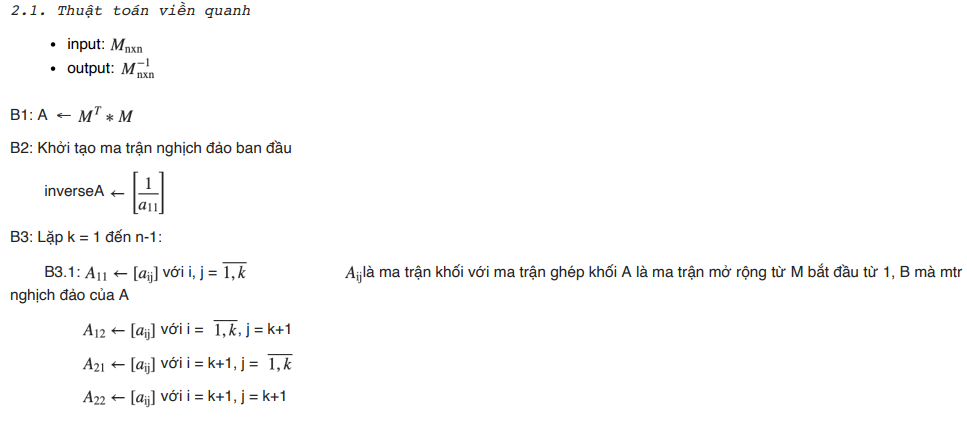  
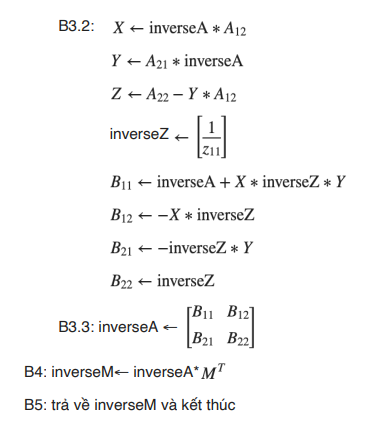


In [11]:
import numpy as np

def vien_quanh(M):
    """
    Tìm ma trận nghịch đảo của ma trận M bằng phương pháp viền quanh.
    
    Tham số:
    M (numpy.ndarray): Ma trận đầu vào cần tìm nghịch đảo.
    precision (int): Số chữ số sau dấu phẩy để in ra.
    
    Trả về:
    numpy.ndarray: Ma trận nghịch đảo của M.
    """
    m, n = M.shape
    
    if m != n:
        raise ValueError("Ma trận phải là ma trận vuông")
    print('ma trận đầu vào M:')
    print(M)
    
    # Biến đổi để đảm bảo ma trận có định thức con chính khác 0
    A = np.dot(M.T, M)
    print('Biến đổi để đảm bảo ma trận có định thức con chính khác 0 bằng cách nhân với M.T thu đc A: ')
    print(A)
    print('-------------------------')
    # Khởi tạo ma trận nghịch đảo ban đầu
    inverseA = np.array([[1 / A[0, 0]]])
    print('khởi tạo inverseA : ')
    print(inverseA)
    # Tạo ma trận khởi
    for i in range(1, m):
        A1 = A[:i, :i]
        anpha12 = A[:i, i:i+1]
        anpha21 = A[i:i+1, :i]
        anpha22 = A[i, i]
        
        print(f"matrix {i+1}x{i+1}")
        
        AA = np.block([
            [A1, anpha12],
            [anpha21, anpha22]
        ])
        print("ma trận A: [[A11,A12],[A21,A22]:")
        print_matrix(AA)
        print('---------------------------------')
        
        # Tìm ma trận B
        X = np.dot(inverseA, anpha12)
        Y = np.dot(anpha21, inverseA)
        Z = anpha22 - np.dot(anpha21, X)
        inverseZ = 1/Z
        
        B1 = inverseA + np.dot(X, np.dot(inverseZ, Y))
      
        beta12 = -np.dot(X, inverseZ)

        beta21 = -np.dot(inverseZ, Y)
     
        beta22 = inverseZ
        
        inverseA = np.block([
            [B1, beta12],
            [beta21, beta22]
        ])
        
        print("ma trận inverse A = B: [[B11,B12],[B21,B22]:")
        print_matrix(inverseA)

    # In ma trận nghịch đảo cuối cùng
    print("ma trận nghịch đảo của M là: M^-1 = A^-1@M.T")
    inverse_matrix = np.dot(inverseA, M.T)
    print(inverse_matrix)
    
    return inverse_matrix

# Ví dụ sử dụng
M = np.array([
    [0, 2, 3, -4],
    [-2, 0, -5, 1],
    [-3, 5, 0, 3],
    [4, 1, -3, 0]
])

inverse_M = vien_quanh(M)


ma trận đầu vào M:
[[ 0  2  3 -4]
 [-2  0 -5  1]
 [-3  5  0  3]
 [ 4  1 -3  0]]
Biến đổi để đảm bảo ma trận có định thức con chính khác 0 bằng cách nhân với M.T thu đc A: 
[[ 29 -11  -2 -11]
 [-11  30   3   7]
 [ -2   3  43 -17]
 [-11   7 -17  26]]
-------------------------
khởi tạo inverseA : 
[[0.03448276]]
matrix 2x2
ma trận A: [[A11,A12],[A21,A22]:
29.0000    -11.0000
-11.0000    30.0000
---------------------------------
ma trận inverse A = B: [[B11,B12],[B21,B22]:
0.0401    0.0147
0.0147    0.0387
matrix 3x3
ma trận A: [[A11,A12],[A21,A22]:
29.0000    -11.0000    -2.0000
-11.0000    30.0000    3.0000
-2.0000    3.0000    43.0000
---------------------------------
ma trận inverse A = B: [[B11,B12],[B21,B22]:
0.0401    0.0146    0.0008
0.0146    0.0389    -0.0020
0.0008    -0.0020    0.0234
matrix 4x4
ma trận A: [[A11,A12],[A21,A22]:
29.0000    -11.0000    -2.0000    -11.0000
-11.0000    30.0000    3.0000    7.0000
-2.0000    3.0000    43.0000    -17.0000
-11.0000    7.0000    -17.00

# 4 thuật toán newton A-1

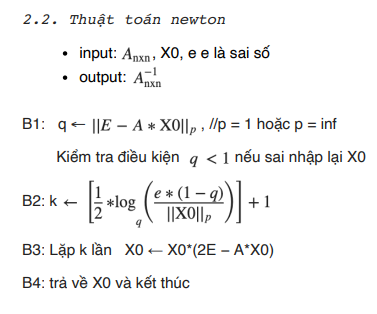  
khá khó ở chọn X0

In [4]:
import numpy as np

def matrix_inverse_iterative(A, epsilon=0.0005):
    """
    Tìm ma trận nghịch đảo của ma trận A bằng phương pháp lặp đơn.
    
    Tham số:
    A (numpy.ndarray): Ma trận đầu vào cần tìm nghịch đảo.
    epsilon (float): Sai số chấp nhận được.
    
    Trả về:
    numpy.ndarray: Ma trận nghịch đảo của A hoặc thông báo nếu không hội tụ.
    """
    # Khởi tạo ma trận X0 bằng ma trận đường chéo nghịch đảo của A
    
    diagonal_elements = np.diag(1/A)
    X0 = np.diag(diagonal_elements) # có thể có các cách chọn X0 khác
    print('X0')
    print(X0)
    # Tính chuẩn q
    q = np.linalg.norm(np.eye(A.shape[0]) - np.dot(A, X0), 1)
    E = np.eye(A.shape[0])
    
    print(f"q = {q}")
    
    if q < 1:
        # Tính số lần lặp k
        k = int(0.5 * np.log((epsilon * (1 - q)) / np.linalg.norm(X0, 1)) / np.log(q)) + 1
        print(f"Số lần lặp k = {k}")
        
        # Lặp để tìm ma trận nghịch đảo
        for i in range(k):
            X0 = np.dot(X0, (2 * E - np.dot(A, X0)))
            print(f"Iteration {i+1}:")
            print(X0)
        
        return X0
    else:
        print("Không hội tụ")
        return None

# Ví dụ sử dụng
A = np.array([
    [100, 2, 3, -4],
    [-2, 50, -5, 1],
    [-3, 5, 100, 3],
    [4, 1, -3, 20]
])

inverse_A = matrix_inverse_iterative(A)


X0
[[0.01 0.   0.   0.  ]
 [0.   0.02 0.   0.  ]
 [0.   0.   0.01 0.  ]
 [0.   0.   0.   0.05]]
q = 0.4
Số lần lặp k = 3
Iteration 1:
[[ 0.01   -0.0004 -0.0003  0.002 ]
 [ 0.0004  0.02    0.001  -0.001 ]
 [ 0.0003 -0.001   0.01   -0.0015]
 [-0.002  -0.001   0.0015  0.05  ]]
Iteration 2:
[[ 0.0099014  -0.00041142 -0.00025564  0.0020401 ]
 [ 0.00046962  0.0199068   0.000949   -0.0010449 ]
 [ 0.00033284 -0.0009754   0.009899   -0.0013673 ]
 [-0.0019531  -0.0010605   0.0014885   0.049432  ]]
Iteration 3:
[[ 0.0099025  -0.00041125 -0.00025645  0.00203953]
 [ 0.00046841  0.01990715  0.00094998 -0.00104417]
 [ 0.00033228 -0.00097591  0.00990014 -0.00136977]
 [-0.00195408 -0.0010595   0.00148881  0.04943884]]


In [18]:
A = np.array([[20,	1,	2,	-3,	2],
                [-5,	50,	-12,	6,	3],
                [4,	3,	50,	2,	11],
                [-5,	-3,	2,	30,	-7],
                [3,	1,	-4,	9,	40]])
np.linalg.inv(A)

array([[ 5.19299155e-02, -5.27606050e-04, -2.50218809e-03,
         5.72538944e-03, -8.66880448e-04],
       [ 3.81199785e-03,  1.95587812e-02,  4.38575682e-03,
        -2.81602163e-03, -3.35639540e-03],
       [-3.35697861e-03, -9.94273854e-04,  1.94839561e-02,
         9.39924378e-05, -5.09921979e-03],
       [ 7.83909226e-03,  1.71607525e-03, -7.64423489e-04,
         3.22262444e-02,  5.32914897e-03],
       [-6.08953723e-03, -9.34943393e-04,  2.19841108e-03,
        -7.60050941e-03,  2.34399454e-02]])